# **DASHBOARD DE FINANÇAS - TATUAGENS LUMM TATTOO**

## **IMPORTS**

In [336]:
# conecta o colab ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [337]:
# Cronometra o tempo de execução do programa
import time
start_script = time.time()

In [338]:
# Importa as bibliotecas necessárias
from datetime import datetime, date
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

##**FUNÇÕES**

In [339]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.2))

##**TRATAMENTO DE DADOS**

In [340]:
# Dados crus para dataframe:
caminho_dados_financeiros = '/content/drive/MyDrive/Tattoos/Financeiro/Fluxo de Caixa CSV.csv'
df_fin = pd.read_csv(caminho_dados_financeiros, sep = ';', header = 1)
df_fin = df_fin.fillna('')

# removendo espaços vazios:
df_fin = df_fin.drop(df_fin[df_fin.Valor == "R$ 0,00"].index)

# Traduzindo coluna Valor (string) em Valor (decimal):
df_fin['Valor'] = df_fin['Valor'].str.replace('R$ ','',regex=False)
df_fin['Valor'] = df_fin['Valor'].str.replace('.','',regex=False)
df_fin['Valor'] = df_fin['Valor'].str.replace(',','.',regex=False)
df_fin['Valor'] = df_fin['Valor'].astype(float)

# Traduzindo Data (string) em Data (datetime):
df_fin['Data'] = pd.to_datetime(df_fin['Data'], format="%d/%m/%Y")

# Usando Data como Index:
df_fin = df_fin.set_index('Data')

# Definindo se foi Ganho ou Custo:
df_fin['Ganho_bool'] = 1 * (df_fin['Valor'] >= 0)
df_fin['Preju_bool'] = 1 * (df_fin['Valor'] <  0)
df_fin['Valor_Ganho'] = df_fin['Valor'] * df_fin['Ganho_bool'] 
df_fin['Valor_Preju'] = df_fin['Valor'] * df_fin['Preju_bool'] 
df_fin = df_fin.drop(columns = {'Ganho_bool', 'Preju_bool'})

# Display do dataframe:
df_fin.head()

,Descrição,Valor,Valor_Ganho,Valor_Preju
Data,,,,
2021-11-20,Pedido - Máquina córun e kit tattoo - Medina shop,-1035.09,-0.0,-1035.09
2022-03-10,TATTOO SUPLIES - ARTEFATO - PARCELA 1/6,-225.09,-0.0,-225.09
2022-03-12,"DESINFET, SNOB E BORRIFADOR",-51.44,-0.0,-51.44
2022-03-14,"GILETTE, PLAST FILME, QUATERNARIO",-60.76,-0.0,-60.76
2022-03-15,tattoo orca xandin 1a sessao,100.00,100.0,0.00


In [341]:
# Separa a soma por mês em um novo dataframe:
df_resumo = df_fin.groupby(pd.Grouper(freq='M')).sum()
df_resumo.columns = ['Somatório','Somatório_Ganho','Somatório_Preju']

# Coluna de valores cumulativos:
df_resumo['Cumulativo'] = df_resumo['Somatório'].cumsum()

# Data (string):
df_resumo['ano'] = df_resumo.index.strftime('%Y').astype(str)
df_resumo['mes'] = df_resumo.index.strftime('%m').astype(str)
df_resumo['MesAno'] = df_resumo['mes'] + '/' + df_resumo['ano']
df_resumo = df_resumo.drop(['ano','mes'], axis=1)

# Display do dataframe:
df_resumo

,Somatório,Somatório_Ganho,Somatório_Preju,Cumulativo,MesAno
Data,,,,,
2021-11-30,-1035.09,0.0,-1035.09,-1035.09,11/2021
2021-12-31,0.00,0.0,0.00,-1035.09,12/2021
2022-01-31,0.00,0.0,0.00,-1035.09,01/2022
2022-02-28,0.00,0.0,0.00,-1035.09,02/2022
2022-03-31,382.71,720.0,-337.29,-652.38,03/2022
2022-04-30,-28.09,420.0,-448.09,-680.47,04/2022
2022-05-31,-263.38,520.0,-783.38,-943.85,05/2022
2022-06-30,-279.47,0.0,-279.47,-1223.32,06/2022
2022-07-31,-279.47,0.0,-279.47,-1502.79,07/2022


In [342]:
# Limitando o dataframe ao dia de hoje:
df_resumo = df_resumo.drop(df_resumo[df_resumo.index > pd.to_datetime(date.today())].index)
df_resumo

,Somatório,Somatório_Ganho,Somatório_Preju,Cumulativo,MesAno
Data,,,,,
2021-11-30,-1035.09,0.0,-1035.09,-1035.09,11/2021
2021-12-31,0.00,0.0,0.00,-1035.09,12/2021
2022-01-31,0.00,0.0,0.00,-1035.09,01/2022
2022-02-28,0.00,0.0,0.00,-1035.09,02/2022
2022-03-31,382.71,720.0,-337.29,-652.38,03/2022
2022-04-30,-28.09,420.0,-448.09,-680.47,04/2022
2022-05-31,-263.38,520.0,-783.38,-943.85,05/2022


##**GERAÇÃO DE GRÁFICOS**

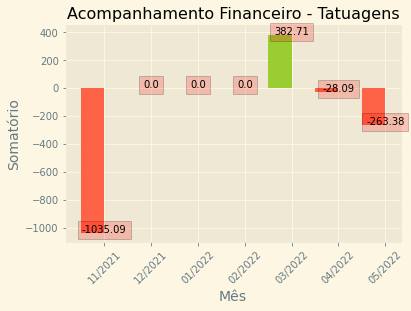

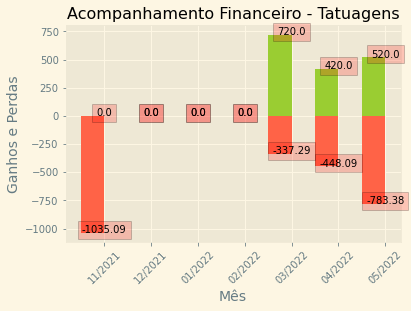

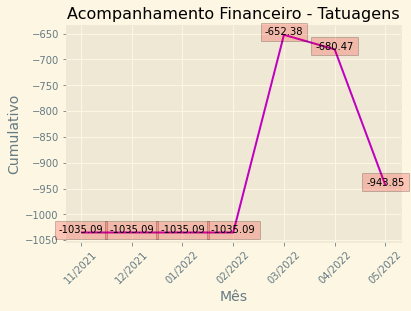

In [348]:
# Montando Gráficos:

x = np.arange(len(df_resumo['MesAno']))  # the label locations
width = 0.5  # the width of the bars

for n in df_resumo.columns:
  if ((n == 'MesAno')|(n == 'Somatório_Preju')):
    pass
  elif n == 'Somatório':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo['MesAno'], df_resumo[n] , linewidth=2.0)
      colors = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo['Somatório']]
      plt.bar(x - width/2, df_resumo[n], width,color=colors, label=n)
      plt.title('Acompanhamento Financeiro - Tatuagens')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo['MesAno']))  # passo de tempo
      addlabels(df_resumo['MesAno'], df_resumo[n])
    plt.show()

  elif n == 'Cumulativo':
    with plt.style.context('Solarize_Light2'):
      plt.plot(df_resumo['MesAno'], df_resumo[n] , 'm', linewidth=2.0)
      # plt.bar(x - width/2, df_resumo[n], width, label=n)
      plt.title('Acompanhamento Financeiro - Tatuagens')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo['MesAno']))  # passo de tempo
      addlabels(df_resumo['MesAno'], df_resumo[n])
    plt.show()
  
  elif n == 'Somatório_Ganho':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo['MesAno'], df_resumo[n] , linewidth=2.0)
      colorsg = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo['Somatório_Ganho']]
      colorsp = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo['Somatório_Preju']]
      plt.bar(x - width/2, df_resumo['Somatório_Ganho'], width,color=colorsg, label=n)
      plt.bar(x - width/2, df_resumo['Somatório_Preju'], width,color=colorsp, label=n)
      plt.title('Acompanhamento Financeiro - Tatuagens')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( 'Ganhos e Perdas' , fontsize=14)
      plt.xticks(x, list(df_resumo['MesAno']))  # passo de tempo
      addlabels(df_resumo['MesAno'], df_resumo['Somatório_Ganho'])
      addlabels(df_resumo['MesAno'], df_resumo['Somatório_Preju'])
    plt.show()

##**FINALIZAÇÃO DO SCRIPT**

In [344]:
end_script = time.time()
print('Tempo do script {:.2f} segundos'.format((end_script - start_script)))

Tempo do script 0.75 segundos
